In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from tqdm import tqdm

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

music_data = pd.read_csv('/content/music_data.csv')
music_data.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [ ]:
music_data.isnull().sum()

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

In [ ]:
music_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [ ]:
music_data.shape

(2000, 18)

# Plot of null values

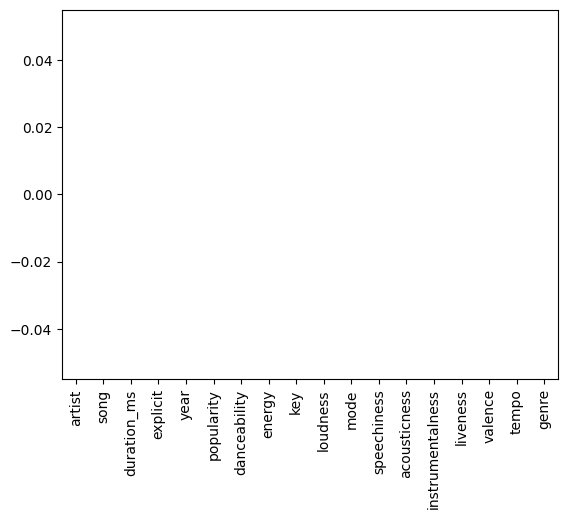

In [ ]:
music_data.isnull().sum().plot.bar()
plt.show()

# Checking for numerical columns

In [ ]:
music_data.select_dtypes(np.number)

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,211160,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053
1,167066,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726
2,250546,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859
3,224493,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992
4,200560,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,181026,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958
1996,178426,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994
1997,200593,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984
1998,171029,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998


# Convert the explicit boolean column into 1s and 0s

In [ ]:
music_data["explicit"] = music_data["explicit"].astype(int)

In [ ]:
music_data.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,0,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,0,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,0,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,0,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,0,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


# Correlation matrix

In [ ]:
corr_matrix = music_data.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
duration_ms,1.000000,0.123595,-0.316534,0.050617,-0.060057,-0.078763,-0.002560,-0.079912,-0.003848,0.066998,0.010923,-0.004208,0.024941,-0.116870,-0.028603
explicit,0.123595,1.000000,0.078477,0.046605,0.248845,-0.162462,0.003320,-0.089829,0.049576,0.417343,-0.033523,-0.082522,0.008884,-0.045455,0.013221
year,-0.316534,0.078477,1.000000,-0.003825,0.033532,-0.108644,0.007380,0.017479,-0.007358,0.001111,0.033809,-0.050265,-0.027037,-0.209365,0.076867
popularity,0.050617,0.046605,-0.003825,1.000000,-0.003546,-0.014021,0.014823,0.030632,-0.021353,0.021162,0.024619,-0.048059,-0.009856,-0.016142,0.014288
danceability,-0.060057,0.248845,0.033532,-0.003546,1.000000,-0.104038,0.032731,-0.033315,-0.067528,0.145590,-0.065429,0.023207,-0.126413,0.403178,-0.173418
energy,-0.078763,-0.162462,-0.108644,-0.014021,-0.104038,1.000000,-0.003446,0.651016,-0.040651,-0.057018,-0.445469,0.037861,0.156761,0.334474,0.153719
key,-0.002560,0.003320,0.007380,0.014823,0.032731,-0.003446,1.000000,-0.007474,-0.153182,0.007147,0.002365,-0.008173,-0.033071,0.036977,-0.001431
loudness,-0.079912,-0.089829,0.017479,0.030632,-0.033315,0.651016,-0.007474,1.000000,-0.028133,-0.076388,-0.310039,-0.104925,0.102159,0.232150,0.080709
mode,-0.003848,0.049576,-0.007358,-0.021353,-0.067528,-0.040651,-0.153182,-0.028133,1.000000,-0.000077,0.005744,-0.038613,0.025439,-0.074681,0.048434
speechiness,0.066998,0.417343,0.001111,0.021162,0.145590,-0.057018,0.007147,-0.076388,-0.000077,1.000000,0.000394,-0.062954,0.061172,0.073605,0.057747


# visualizing trend in music against the years for independent features

In [ ]:
from sklearn.preprocessing import StandardScaler
import plotly.express as px

100%|██████████| 13/13 [00:09<00:00,  1.33it/s]


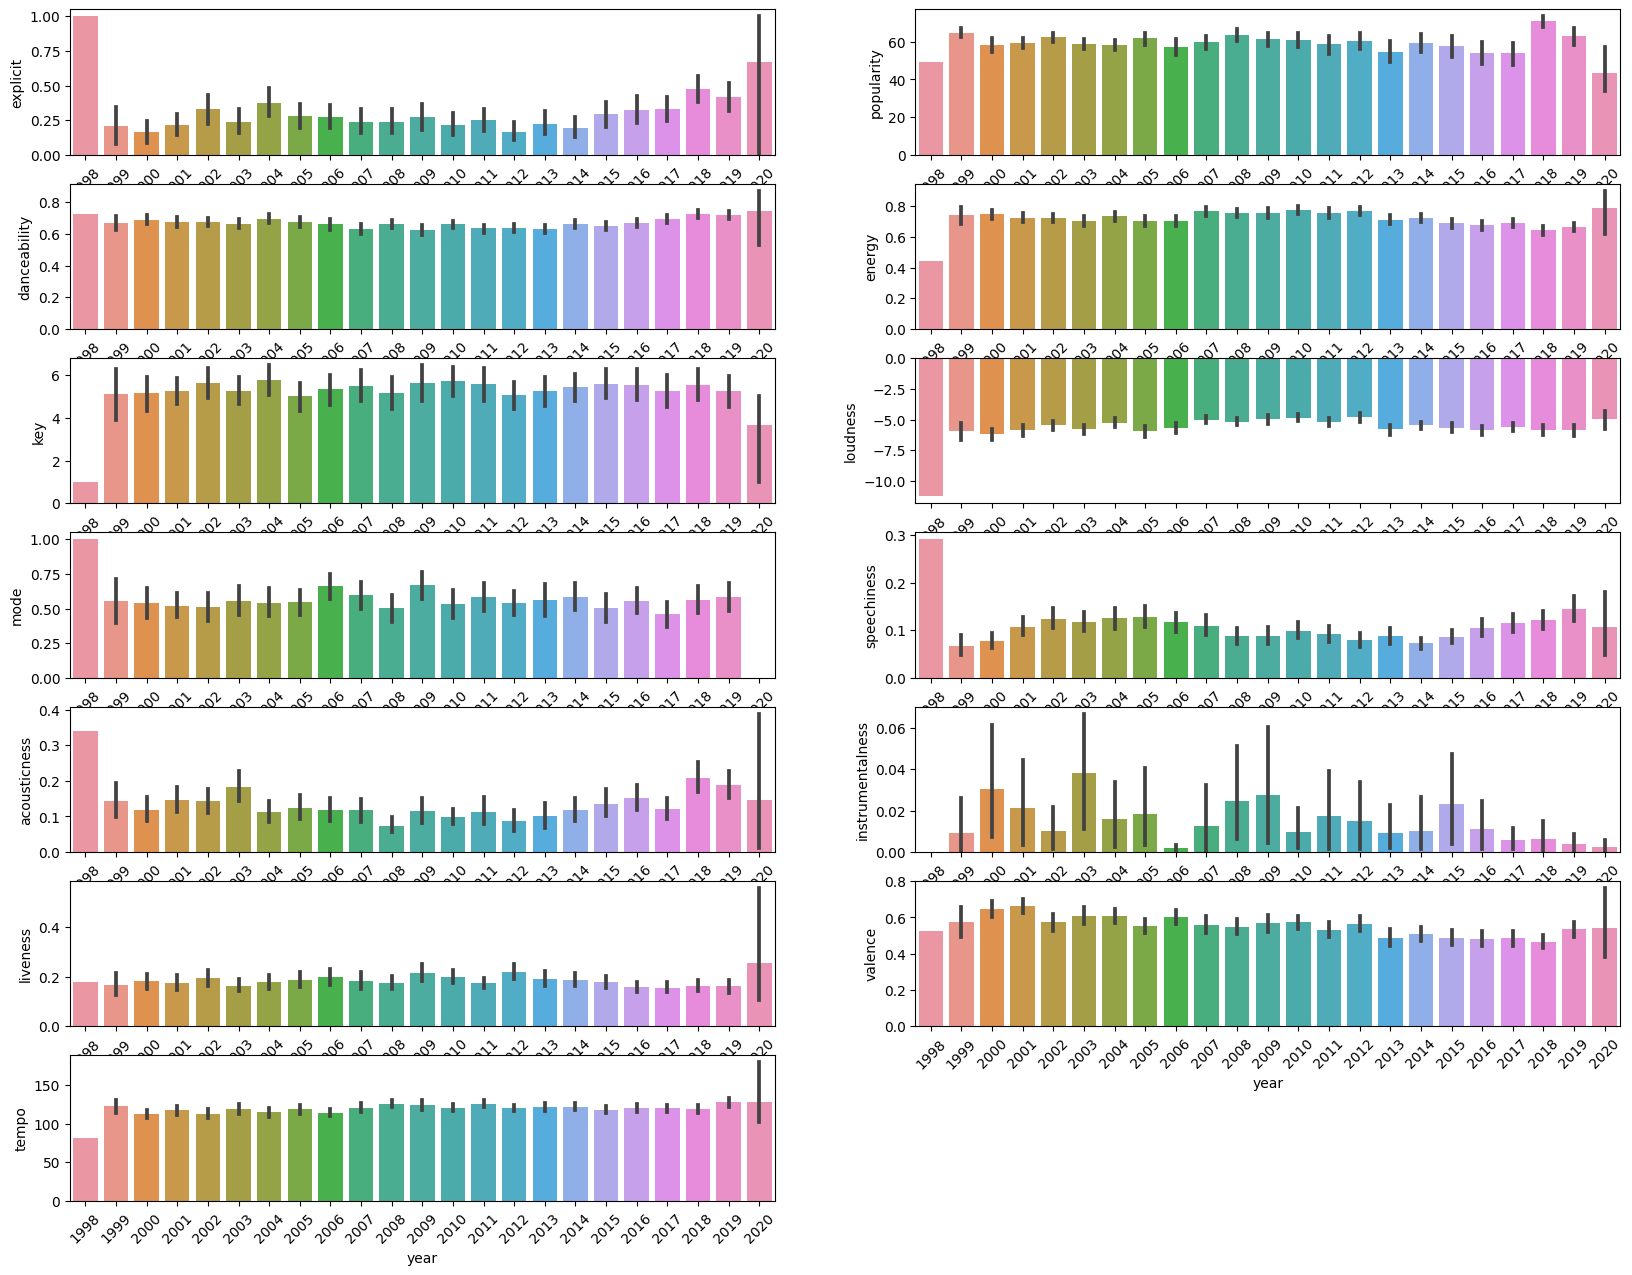

In [ ]:
visual_data = music_data.drop(columns=['song', 'artist', 'year', 'genre'])

plt.figure(figsize=(20, 20))
for i in tqdm(np.arange(1, len(visual_data.columns))):
    plt.subplot(9, 2, i)
    sb.barplot(x=music_data.year,y=visual_data[visual_data.columns[i]])
    plt.xticks(rotation=45);
plt.show()

# Heat map

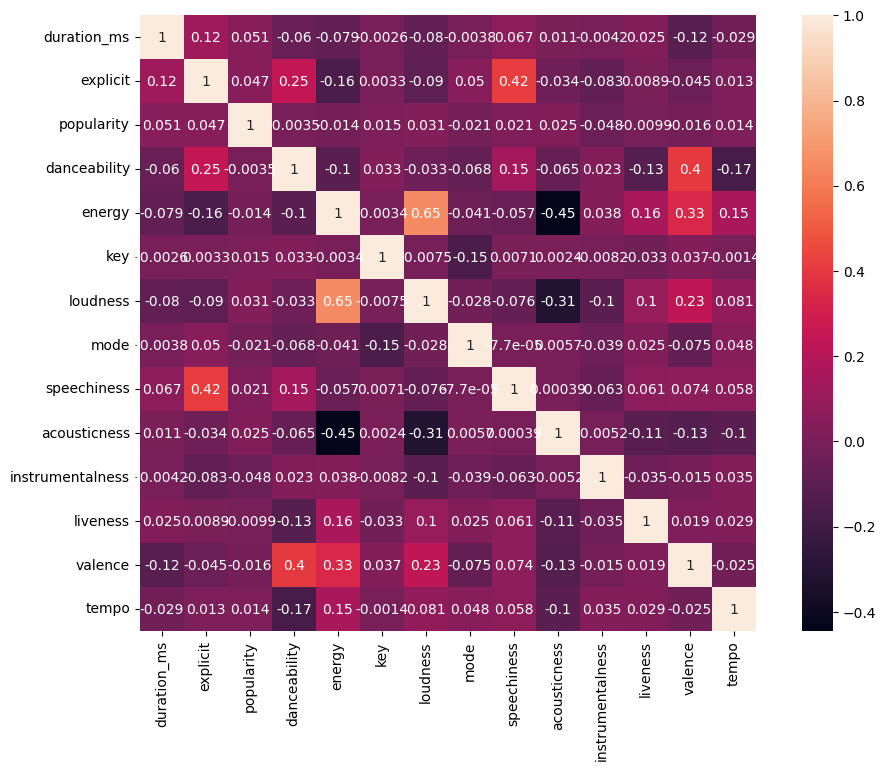

In [ ]:
plt.subplots(figsize=(12, 8))
sb.heatmap(visual_data.corr(), annot=True, square=True)
plt.show()

# ENCODING THE MUSIC GENRE COLUMN

In [ ]:
from sklearn.preprocessing import OneHotEncoder
unique_genres = set()
for genre_list in music_data["genre"]:
    genres = genre_list.split(",")
    for genre in genres:
        unique_genres.add(genre)

# Create a one-hot encoding for the genre column
encoder = OneHotEncoder()
encoder.fit([[genre] for genre in unique_genres])

# Encode the genre data
encoded_genres = []
for genres in music_data["genre"]:
    genres = genres.split(",")
    one_hot = [0 if genre not in genres else 1 for genre in unique_genres]
    encoded_genres.append(one_hot)

# Normalizing the columns

In [ ]:
import os
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore")

In [ ]:
def normalize_column(col):
    max_d = music_data[col].max()
    min_d = music_data[col].min()
    music_data[col] = (music_data[col] - min_d)/(max_d - min_d)

In [ ]:
num_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num = music_data.select_dtypes(include=num_types)

for col in num.columns:
    if col != 'year':
        normalize_column(col)

# Boxplot visualization to identify outliers

<Axes: >

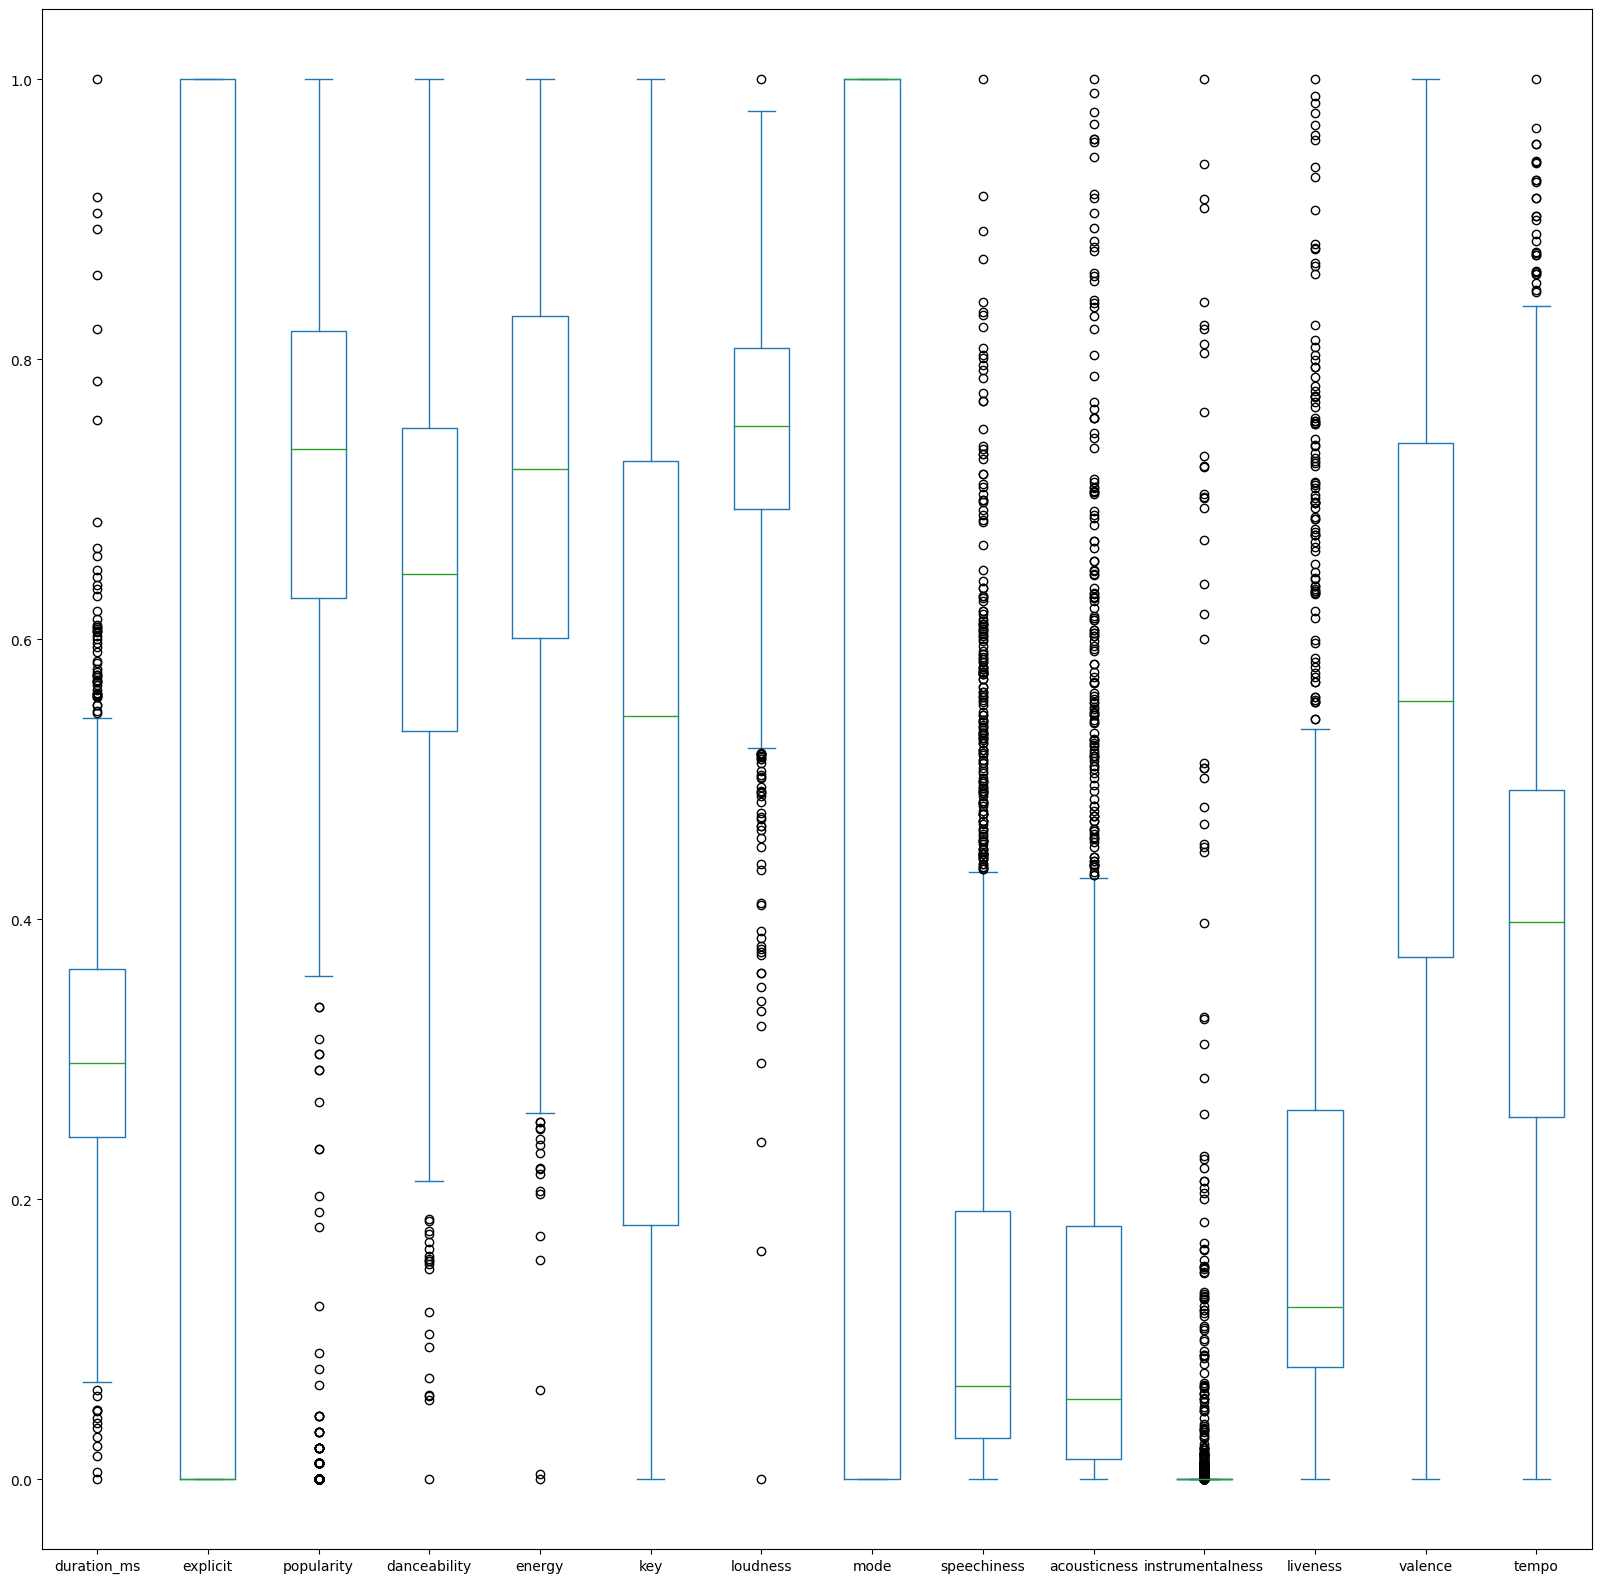

In [ ]:
music_data.select_dtypes(np.number).drop(columns = ['year']).plot(kind='box' ,figsize=(20, 20) ,fontsize=10)

# Scatterplot visualization to see patterns of interest

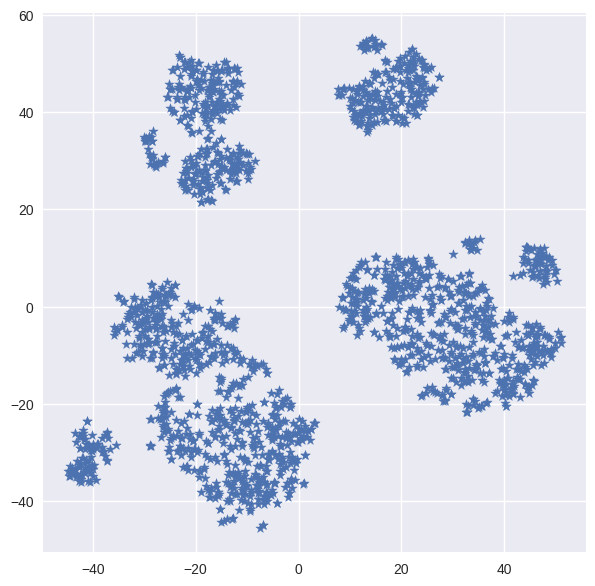

In [ ]:
model = TSNE(n_components = 2, random_state = 0)
music_data_modified = music_data.select_dtypes(np.number).drop(columns=['year'])
tsne_data = model.fit_transform(music_data_modified)
plt.style.use('seaborn')
plt.figure(figsize = (7, 7))
plt.scatter(tsne_data[:,0], tsne_data[:,1],  marker= '*')
plt.show()

# JOINING THE ENCODED GENRE COLUMNS WITH THE ORIGINAL DATASET

In [ ]:
encoded_genres_df = pd.DataFrame(encoded_genres)

encoded_genres_df.columns = unique_genres
encoded_genres_df

,pop,R&B,country,rock,rock,Folk/Acoustic,easy listening,Dance/Electronic,set(),pop,...,Dance/Electronic,latin,easy listening,jazz,country,metal,Folk/Acoustic,classical,hip hop,hip hop
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1998,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:


# Concatenate the encoded genres DataFrame with the original dataset
music_data = pd.concat([music_data, encoded_genres_df], axis=1)

# View the dataset with the encoded genres
music_data.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,...,Dance/Electronic,latin,easy listening,jazz,country,metal,Folk/Acoustic,classical,hip hop,hip hop
0,Britney Spears,Oops!...I Did It Again,0.264478,0.0,2000,0.865169,0.735225,0.825230,0.090909,0.744639,...,0,0,0,0,0,0,0,0,0,0
1,blink-182,All The Small Things,0.145673,0.0,1999,0.887640,0.360520,0.891961,0.000000,0.770630,...,0,0,0,0,0,0,0,0,0,0
2,Faith Hill,Breathe,0.370598,0.0,1999,0.741573,0.472813,0.467217,0.636364,0.568584,...,0,0,0,0,1,0,0,0,0,0
3,Bon Jovi,It's My Life,0.300402,0.0,2000,0.876404,0.498818,0.908908,0.000000,0.812877,...,0,0,0,0,0,0,0,0,0,0
4,*NSYNC,Bye Bye Bye,0.235918,0.0,2000,0.730337,0.573286,0.924796,0.727273,0.776164,...,0,0,0,0,0,0,0,0,0,0


# importing the KMeans clustering algorithm that is used to generate categories from music relations

In [ ]:
import pickle

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=10)
cat = km.fit_predict(num)
pickle.dump(km , open('knn_model.pk1' , 'wb'))
music_data['cat'] = cat
normalize_column('cat')

In [ ]:
music_data.cat[:10]

0    0.777778
1    0.888889
2    0.111111
3    0.777778
4    0.444444
5    0.111111
6    0.222222
7    0.111111
8    0.666667
9    0.222222
Name: cat, dtype: float64

In [ ]:
cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=10))])
X = music_data.select_dtypes(np.number)
cluster_pipeline.fit(X)
pickle.dump(km , open('cluster_model.pk1' , 'wb'))
music_data['cluster'] = cluster_pipeline.predict(X)

# Visualizing the Clusters with t-SNE

In [ ]:
tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2, verbose=1))])
genre_embedding = tsne_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['genres'] = music_data['genre']
projection['cluster'] = music_data['cluster']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'genres'])
fig.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.001s...
[t-SNE] Computed neighbors for 2000 samples in 0.139s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 1.694878
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.970757
[t-SNE] KL divergence after 1000 iterations: 1.118783


# Splitting the data into train, test and validation sets

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X = music_data.select_dtypes(np.number).drop(columns = ['cat','cluster','year']).copy()
y = music_data['cluster']

In [ ]:
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8, random_state=0)

X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

print('X_train= ',X_train.shape), print('y_train= ', y_train.shape)
print('x_train= ',X_valid.shape), print('y_valid= ',y_valid.shape)
print('x_test=  ',X_test.shape), print('y_test=  ',y_test.shape)

X_train=  (1600, 39)
y_train=  (1600,)
x_train=  (200, 39)
y_valid=  (200,)
x_test=   (200, 39)
y_test=   (200,)


(None, None)

# using various values of K we shall train our model

In [ ]:
knn1= KNeighborsClassifier(metric='cosine', algorithm='brute', n_neighbors=1)
knn5= KNeighborsClassifier(metric='cosine', algorithm='brute', n_neighbors=5)
knn10= KNeighborsClassifier(metric='cosine', algorithm='brute', n_neighbors=10)

# fitted with both the training and validation data then training data again to learn different patterns and prevent bias

In [ ]:
model_knn5 = knn5.fit(X_train, y_train)
pickle.dump(model_knn5 , open('knn5Model.pk1' , 'wb'))
knn1.fit(X_train, y_train)
knn10.fit(X_train, y_train)

knn5.fit(X_valid, y_valid)
knn1.fit(X_valid, y_valid)
knn10.fit(X_valid, y_valid)

knn5.fit(X_train, y_train)
knn1.fit(X_train, y_train)
knn10.fit(X_train, y_train)

y_pred_5 = knn5.predict(X_valid)
y_pred_1 = knn1.predict(X_valid)
y_pred_10 = knn1.predict(X_valid)

In [ ]:
X_valid

,duration_ms,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,...,Dance/Electronic,latin,easy listening,jazz,country,metal,Folk/Acoustic,classical,hip hop,hip hop
152,0.296738,1.0,0.640449,0.907801,0.435441,0.909091,0.566311,0.0,0.325253,0.191582,...,0,0,0,0,0,0,0,0,0,1
900,0.474565,0.0,0.898876,0.725768,0.753204,0.000000,0.698636,1.0,0.005970,0.089429,...,0,0,0,0,0,0,0,0,0,1
781,0.218817,0.0,0.741573,0.658392,0.777566,0.727273,0.780759,0.0,0.374096,0.012788,...,0,0,0,0,0,0,0,0,0,0
1922,0.153075,0.0,0.000000,0.593381,0.792395,0.000000,0.866686,0.0,0.238423,0.691592,...,0,0,0,0,0,0,0,0,0,0
1005,0.263651,0.0,0.853933,0.492908,0.912086,0.727273,0.819350,1.0,0.419320,0.001456,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,0.308019,0.0,0.640449,0.365248,0.653638,1.000000,0.781105,0.0,0.035637,0.005616,...,0,0,0,0,0,0,0,0,0,0
240,0.297169,0.0,0.550562,0.858156,0.663171,0.181818,0.768801,1.0,0.082489,0.090248,...,0,0,0,0,0,0,0,0,0,1
1357,0.307119,0.0,0.561798,0.510638,0.827349,0.818182,0.819004,1.0,0.138929,0.053772,...,0,0,0,0,0,0,0,0,0,1
1654,0.202004,0.0,0.921348,0.372340,0.809342,0.909091,0.812136,0.0,0.574891,0.108589,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_pred_5

array([7, 1, 5, 5, 1, 5, 6, 5, 8, 1, 7, 5, 5, 5, 7, 7, 7, 7, 2, 5, 4, 9,
       5, 2, 5, 7, 1, 5, 5, 7, 1, 7, 5, 2, 5, 1, 5, 7, 2, 7, 7, 5, 5, 2,
       5, 7, 1, 7, 9, 7, 7, 5, 7, 7, 2, 5, 5, 5, 2, 5, 1, 5, 2, 7, 5, 4,
       5, 5, 7, 1, 7, 2, 4, 5, 5, 7, 5, 5, 5, 5, 1, 7, 7, 5, 5, 7, 5, 1,
       2, 1, 5, 1, 5, 5, 5, 5, 5, 5, 1, 4, 1, 7, 7, 1, 1, 1, 1, 4, 7, 1,
       7, 4, 5, 7, 1, 5, 4, 5, 7, 2, 4, 2, 5, 4, 1, 7, 2, 7, 5, 7, 5, 1,
       1, 5, 1, 5, 4, 5, 7, 5, 5, 1, 5, 2, 5, 4, 1, 4, 2, 5, 1, 5, 5, 1,
       4, 7, 1, 2, 5, 5, 2, 1, 5, 1, 7, 7, 5, 5, 5, 1, 5, 5, 7, 7, 5, 5,
       7, 5, 2, 5, 4, 5, 5, 7, 7, 7, 5, 1, 4, 5, 7, 5, 5, 7, 7, 5, 1, 1,
       5, 2], dtype=int32)

# accuracy score

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy with k=5", accuracy_score(y_valid, y_pred_5)*100)
print("Accuracy with k=1", accuracy_score(y_valid, y_pred_1)*100)
print("Accuracy with k=10", accuracy_score(y_valid, y_pred_10)*100)

Accuracy with k=5 95.0
Accuracy with k=1 95.0
Accuracy with k=10 95.0


# confusion matrix

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_valid, y_pred_1))
print(confusion_matrix(y_valid, y_pred_5))
print(confusion_matrix(y_valid, y_pred_10))

[[35  0  0  0  0  0  0  0  0]
 [ 1 18  0  0  7  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0]
 [ 0  0  0 15  0  0  0  0  0]
 [ 0  2  0  0 71  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0 46  0  0]
 [ 0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  2]]
[[35  0  0  0  0  0  0  0  0]
 [ 1 18  0  0  7  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0]
 [ 0  0  0 15  0  0  0  0  0]
 [ 0  1  0  0 72  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0 46  0  0]
 [ 0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  2]]
[[35  0  0  0  0  0  0  0  0]
 [ 1 18  0  0  7  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0]
 [ 0  0  0 15  0  0  0  0  0]
 [ 0  2  0  0 71  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0 46  0  0]
 [ 0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  2]]


# Classification report

In [ ]:
print(classification_report(y_valid, y_pred_1))
print(classification_report(y_valid, y_pred_5))
print(classification_report(y_valid, y_pred_10))

              precision    recall  f1-score   support

           1       0.97      1.00      0.99        35
           2       0.90      0.69      0.78        26
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00        15
           5       0.91      0.97      0.94        73
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00        46
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         2

    accuracy                           0.95       200
   macro avg       0.98      0.96      0.97       200
weighted avg       0.95      0.95      0.95       200

              precision    recall  f1-score   support

           1       0.97      1.00      0.99        35
           2       0.95      0.69      0.80        26
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00        15
           5       0.91 

# Visualizing the prediction

In [ ]:
tsne_model = TSNE(n_components = 2, random_state = 0)
tsne_data_X_valid = tsne_model.fit_transform(X_test)

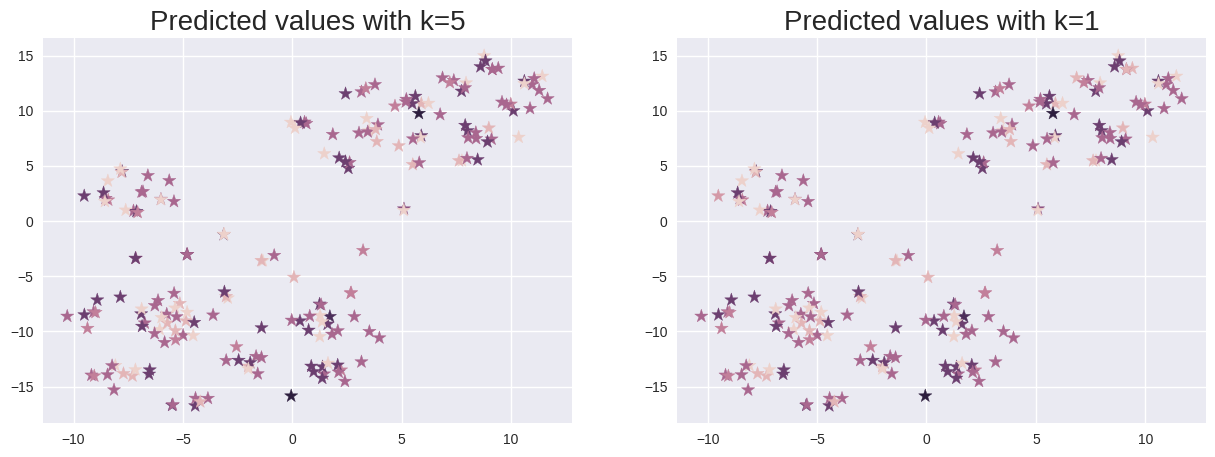

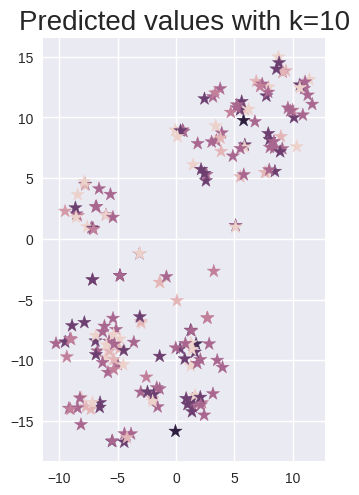

In [ ]:
cmap = sb.cubehelix_palette(as_cmap=True)
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.scatter(tsne_data_X_valid[:,0], tsne_data_X_valid[:,1], c=y_pred_5, marker= '*', s=100, cmap=cmap)
plt.title("Predicted values with k=5", fontsize=20)
plt.subplot(1,2,2)
plt.scatter(tsne_data_X_valid[:,0], tsne_data_X_valid[:,1], c=y_pred_1, marker= '*', s=100, cmap=cmap)
plt.title("Predicted values with k=1", fontsize=20)
plt.show()
plt.subplot(1,2,2)
plt.scatter(tsne_data_X_valid[:,0], tsne_data_X_valid[:,1], c=y_pred_10, marker= '*', s=100, cmap=cmap)
plt.title("Predicted values with k=10", fontsize=20)
plt.show()

# Creating a recommendation machine

In [ ]:
!python -m pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org fuzzywuzzy

In [ ]:
from fuzzywuzzy import process
X_test

,duration_ms,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,...,Dance/Electronic,latin,easy listening,jazz,country,metal,Folk/Acoustic,classical,hip hop,hip hop
987,0.454161,0.0,0.629213,0.094563,0.865480,0.818182,0.865599,1.0,0.094971,0.222321,...,0,0,0,0,0,0,0,0,0,0
1900,0.118730,0.0,0.887640,0.885343,0.597500,0.545455,0.738907,1.0,0.142547,0.054592,...,0,0,0,0,0,0,0,0,0,1
215,0.279890,0.0,0.932584,0.504728,0.857007,0.272727,0.723589,0.0,0.063676,0.009796,...,0,0,0,0,0,0,0,0,0,0
1279,0.263651,0.0,0.707865,0.653664,0.783921,0.727273,0.708766,0.0,0.024421,0.030411,...,0,0,0,0,0,0,0,0,0,0
118,0.378789,0.0,0.606742,0.628842,0.847474,0.727273,0.598429,1.0,0.026230,0.073957,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,0.227043,0.0,0.887640,0.589835,0.569961,0.727273,0.764799,1.0,0.016462,0.095269,...,0,0,0,0,0,0,0,0,0,0
1724,0.271985,1.0,0.011236,0.882979,0.650461,1.000000,0.714497,0.0,0.207670,0.166992,...,0,0,0,0,0,0,0,0,0,1
575,0.256500,0.0,0.674157,0.385343,0.925855,1.000000,0.850825,1.0,0.047395,0.089634,...,0,0,0,0,0,0,0,0,0,0
1295,0.248813,0.0,0.797753,0.617021,0.678000,0.545455,0.854630,1.0,0.046129,0.235641,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_test.shape

(200, 39)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
recommendation_set = music_data.merge(X_test, how = 'inner' ,indicator=False)
recommendation_set

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,...,easy listening,jazz,country,metal,Folk/Acoustic,classical,hip hop,hip hop,cat,cluster
0,blink-182,All The Small Things,0.145673,0.0,1999,0.887640,0.360520,0.891961,0.000000,0.770630,...,0,0,0,0,0,0,0,0,0.888889,4
1,Eminem,The Real Slim Shady,0.461274,1.0,2000,0.966292,0.969267,0.641987,0.454545,0.803933,...,0,0,0,0,0,0,0,1,0.222222,7
2,Modjo,Lady - Hear Me Tonight,0.523118,0.0,2001,0.865169,0.698582,0.797691,0.545455,0.735596,...,0,0,0,0,0,0,0,0,0.222222,5
3,Alice Deejay,Better Off Alone,0.274509,0.0,2000,0.820225,0.640662,0.873954,0.727273,0.709803,...,0,0,0,0,0,0,0,0,0.777778,5
4,Gigi D'Agostino,The Riddle,0.464577,0.0,1999,0.719101,0.722222,0.869717,0.545455,0.674177,...,0,0,0,0,0,0,0,0,0.222222,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Halsey,Without Me,0.238882,1.0,2018,0.865169,0.736407,0.458744,0.545455,0.665283,...,0,0,0,0,0,0,0,0,0.444444,5
205,Calvin Harris,Giant (with Rag'n'Bone Man),0.313041,0.0,2019,0.820225,0.801418,0.881368,0.090909,0.800623,...,0,0,0,0,0,0,0,1,0.333333,1
206,Ed Sheeran,Take Me Back to London (feat. Stormzy),0.206746,1.0,2019,0.741573,0.893617,0.748967,0.727273,0.741229,...,0,0,0,0,0,0,0,0,0.888889,5
207,Megan Thee Stallion,Hot Girl Summer (feat. Nicki Minaj & Ty Dolla ...,0.232865,1.0,2019,0.775281,0.878251,0.804046,0.000000,0.787924,...,0,0,0,0,0,0,0,1,0.444444,7


In [ ]:
def recommender(song_name, data,model):
    idx=process.extractOne(song_name, recommendation_set['song'])[2]
    print('Song Selected:-',recommendation_set['song'][idx], 'Index: ',idx)
    print('Searching for recommendations.....')
    requiredSongs = recommendation_set.select_dtypes(np.number).drop(columns = ['cat','cluster','year']).copy()
    distances, indices = model.kneighbors(requiredSongs.iloc[idx].values.reshape(1,-1))
    for i in indices:
        print(music_data['song'][i] + "      " + music_data['artist'][i])


In [ ]:
def get_song_info(row_number):
    song_info = recommendation_set.loc[row_number, ["song", "artist"]]
    return song_info

song_info = get_song_info(1)
print("Song name: ", song_info[0])
print("Artist name: ", song_info[1])

Song name:  The Real Slim Shady
Artist name:  Eminem


In [ ]:
recommendation_set.to_csv('recommendation_set.csv')

In [ ]:
import pickle
knn5Model = pickle.load(open('/content/knn5Model.pk1' , 'rb'))

song_name = song_info[0]
recommender(song_name,X_test, knn5Model)

Song Selected:- The Riddle Index:  4
Searching for recommendations.....
575               Scars      Papa Roach
286     U Don't Have to Call      Usher
168     There You'll Be      Faith Hill
1185          F**kin' Perfect      P!nk
1330    Come & Get It      Selena Gomez
dtype: object


# Using lime to visualize predictions

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=8ab75f26acffdc8e3ab36a59e19672516be4079fc9ea49391a8c03d325903f02
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


<Figure size 1200x800 with 0 Axes>

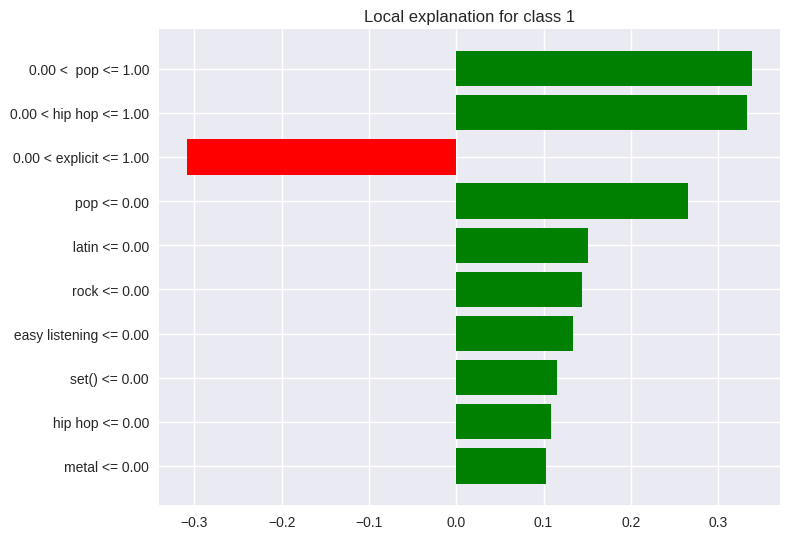

In [ ]:
import lime
import lime.lime_tabular

# Create an instance of the LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=knn5.classes_, discretize_continuous=True)

# Calculate the LIME explanation for a sample from the test data
exp = explainer.explain_instance(X_valid.iloc[0,:].values, knn5.predict_proba, num_features=10)

# Access the LIME explanation values
lime_values = exp.local_exp[1]

fig = plt.figure(figsize=(12, 8))
exp.as_pyplot_figure()
plt.tight_layout()